**Oussama BOUFARRA**

**Ayoub DAHBI**

**3IIR - G6**

In [1]:
import pandas as pd 
import numpy as np
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This cell imports several Python libraries such as pandas, numpy, fuzz, matplotlib, seaborn, warnings, re, plotly.express, plotly.graph_objs, plotly.figure_factory, and Counter from the collections module.


It also sets the warning filter to ignore any warnings that may occur while running the code. The %matplotlib inline command allows for plots to be displayed directly in the Jupyter notebook.

In [2]:
df = pd.read_csv('/kaggle/input/amazon/amazon.csv')

This cell reads in a CSV file named "amazon.csv" from the "/kaggle/input/amazon/" directory using the read_csv() function from the pandas library, and assigned to a DataFrame object named df.

In [3]:
df['platform']='amazon'

This cell adds a new column called "platform" to the DataFrame object df and assigns the string "amazon" to every row in the new column.

This code can be useful in situations where you have multiple datasets that you want to combine into a single dataset, but need a way to keep track of which dataset each row came from. By adding a column indicating the source platform for each row, you can later filter or group the data based on this information.

**Top 5 des meilleures catégories.**


In [4]:
df['listed_in'].value_counts().nlargest(5).to_frame()

,listed_in
Drama,986
Comedy,536
"Drama, Suspense",399
"Comedy, Drama",377
"Animation, Kids",356


This cell is performing an operation on the DataFrame object df that will return a new DataFrame object containing the top 5 values in the "listed_in" column, along with their respective counts.

Here is a breakdown of what the code is doing:
 
* **df['listed_in']:** This extracts the "listed_in" column from the DataFrame object df.

* **.value_counts():** This counts the number of times each unique value appears in the "listed_in" column.
 
* **.nlargest(5):** This returns the top 5 values in the column, based on their counts.
 
* **.to_frame():** This converts the resulting Series object into a DataFrame object.

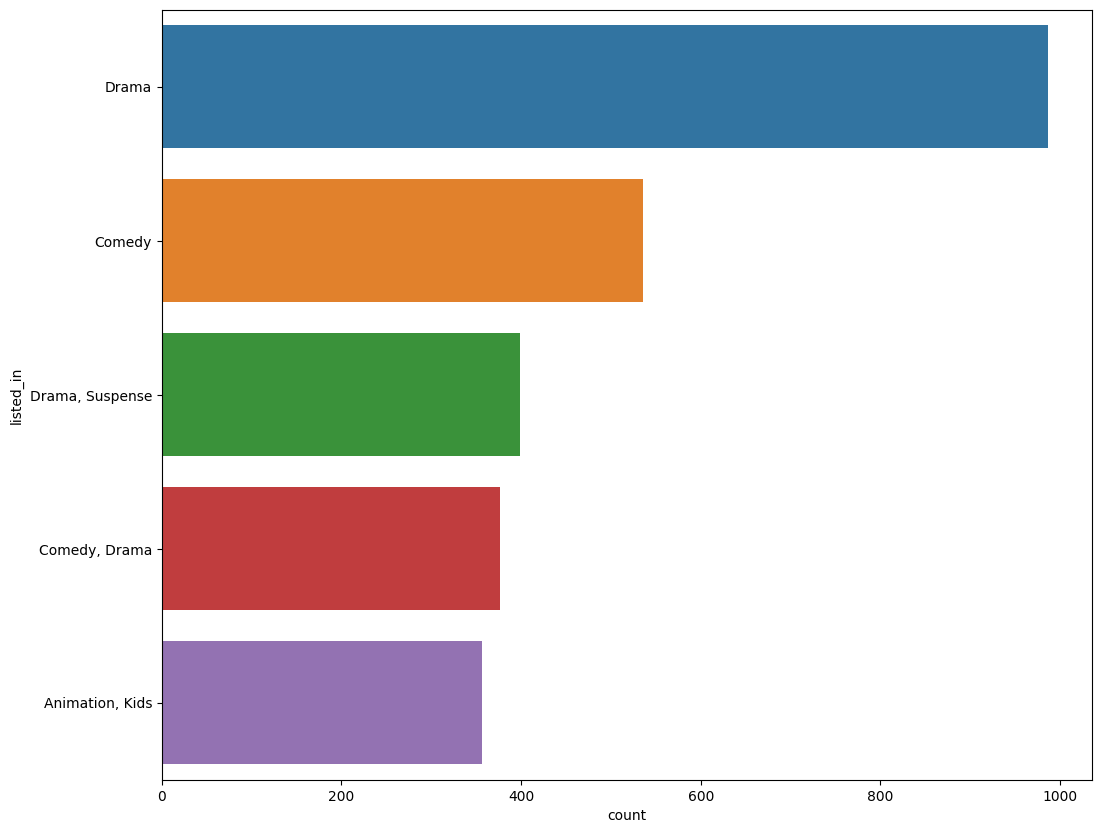

In [5]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="listed_in", data=df, order=df.listed_in.value_counts().index[0:5])

This cell creates a countplot using the seaborn library to visualize the frequency distribution of values in the "listed_in" column of the DataFrame object df.

Here is a breakdown of what the code is doing:

* **plt.figure(figsize=(12,10)):** This sets the size of the figure that will display the countplot.

* **sns.countplot(y="listed_in", data=df, order=df.listed_in.value_counts().index[0:5]):** This creates the countplot by specifying the "listed_in" column as the variable to count and the DataFrame object df as the data source. The order parameter is used to sort the categories in descending order based on their frequency counts. The top 5 categories are selected using the index[0:5] slice.

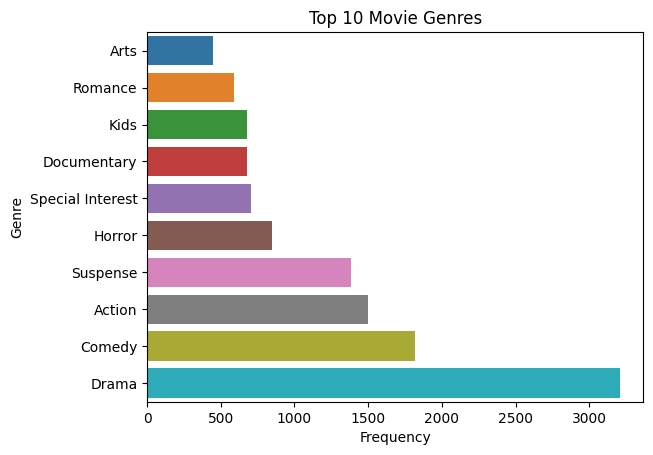

In [6]:
d1 = df[df['type'] == "Movie"]
categories = ", ".join(d1['listed_in']).split(", ")
counter_list = Counter(categories).most_common(10)
counter_list = counter_list[::-1]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]
sns.barplot(x=values, y=labels)
plt.title("Top 10 Movie Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

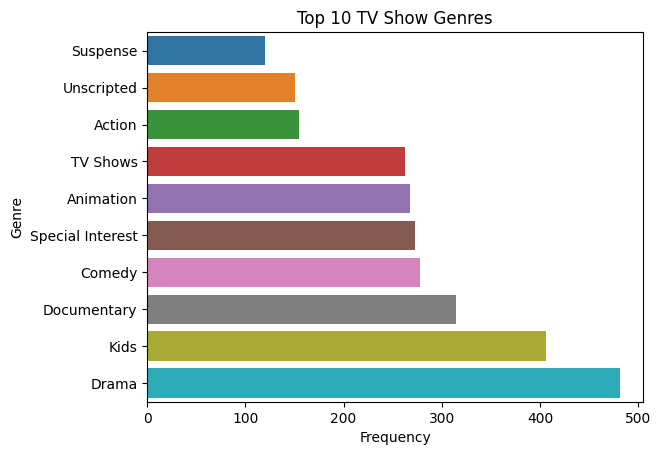

In [7]:
d1 = df[df['type'] == "TV Show"]
categories = ", ".join(d1['listed_in']).split(", ")
counter_list = Counter(categories).most_common(10)
counter_list = counter_list[::-1]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]
sns.barplot(x=values, y=labels)
plt.title("Top 10 TV Show Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

**Top 5 des réalisateurs.**


In [8]:
df['director'].value_counts().nlargest(5).to_frame()

,director
Mark Knight,113
Cannis Holder,61
Moonbug Entertainment,37
Jay Chapman,34
Arthur van Merwijk,30


This cell is performing an operation on the DataFrame object df that will return a new DataFrame object containing the top 5 values in the "director" column, along with their respective counts.

Here is a breakdown of what the code is doing:

* **df['director']:** This extracts the "director" column from the DataFrame object df.

* **.value_counts():** This counts the number of times each unique value appears in the "director" column.

* **.nlargest(5):** This returns the top 5 values in the column, based on their counts.

* **.to_frame():** This converts the resulting Series object into a DataFrame object.

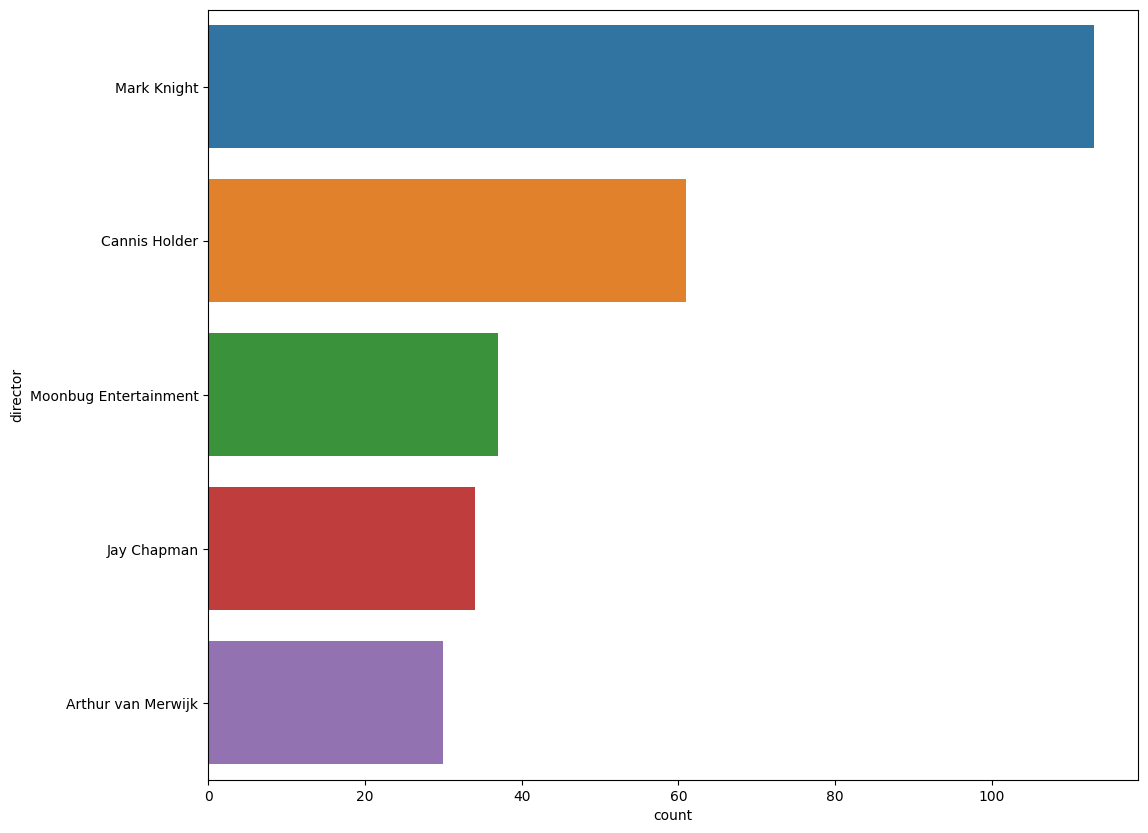

In [9]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="director", data=df, order=df.director.value_counts().index[0:5])

This cell creates a countplot using the seaborn library to visualize the frequency distribution of values in the "director" column of the DataFrame object df.

Here is a breakdown of what the code is doing:

* **plt.figure(figsize=(12,10)):** This sets the size of the figure that will display the countplot.

* **sns.countplot(y="director", data=df, order=df.director.value_counts().index[0:5]):** This creates the countplot by specifying the "director" column as the variable to count and the DataFrame object df as the data source. The order parameter is used to sort the directors in descending order based on their frequency counts. The top 5 directors are selected using the index[0:5] slice.

**Top 10 des acteurs**

In [10]:
actors=df['cast'].str.split(',', expand=True).stack()
actors.value_counts().nlargest(10).to_frame()

,0
Maggie Binkley,56
1,35
Gene Autry,32
Nassar,30
Champion,29
Anne-Marie Newland,25
Prakash Raj,23
Roy Rogers,23
Cassandra Peterson,22
John Wayne,21


This cell creates a DataFrame containing the top 10 most frequently appearing actors/actresses in the "cast" column of the DataFrame object df.

Here's a breakdown of the code:

* **actors=df['cast'].str.split(',', expand=True).stack():** creates a new DataFrame called actors by splitting the strings in the "cast" column of the df DataFrame on commas and stacking the resulting columns on top of each other. This creates a single column of all the actors/actresses in the dataset.

* **actors.value_counts().nlargest(10).to_frame():** calls the value_counts() method on the actors Series to count the frequency of occurrence of each actor/actress and returns the top 10 most common ones as a DataFrame. The resulting DataFrame has one column, which contains the actor/actress names, and one row for each actor/actress, with the number of occurrences in the second column.

**Les contenus similaires avec correspondence des caractéristiques textuelles**

In [11]:
Drama_df = df[df["listed_in"]=="Drama"]
similar_content = []
for i1, row1 in Drama_df.iterrows():
    for i2, row2 in Drama_df.iterrows():
        if i2 > i1 and fuzz.ratio(row1['description'], row2['description']) > 50:
            similar_content_pair = (row1['title'], row2['title'])
            similar_content.append(similar_content_pair)
similar_content

[('Wayne (4K UHD)', 'Wayne'),
 ('Thappad (4K UHD)', 'Thappad'),
 ('One Child', 'DEPARTURE'),
 ('Nadigaiyar Thilagam (Tamil)', 'Mahanati (Telugu)'),
 ('Movie10y', 'Movie10x'),
 ('Master (Telugu) [4K UHD]', 'Master (Telugu)'),
 ('Master (Telugu) [4K UHD]', 'Master (Tamil) [4K UHD]'),
 ('Master (Telugu) [4K UHD]', 'Master (Tamil)'),
 ('Master (Telugu) [4K UHD]', 'Master (Malayalam) [4K UHD]'),
 ('Master (Telugu) [4K UHD]', 'Master (Malayalam)'),
 ('Master (Telugu)', 'Master (Tamil) [4K UHD]'),
 ('Master (Telugu)', 'Master (Tamil)'),
 ('Master (Telugu)', 'Master (Malayalam) [4K UHD]'),
 ('Master (Telugu)', 'Master (Malayalam)'),
 ('Master (Tamil) [4K UHD]', 'Master (Tamil)'),
 ('Master (Tamil) [4K UHD]', 'Master (Malayalam) [4K UHD]'),
 ('Master (Tamil) [4K UHD]', 'Master (Malayalam)'),
 ('Master (Tamil)', 'Master (Malayalam) [4K UHD]'),
 ('Master (Tamil)', 'Master (Malayalam)'),
 ('Master (Malayalam) [4K UHD]', 'Master (Malayalam)'),
 ('Lake Effects', 'Before Your Time'),
 ('Kshay', 'Yeva

This cell compares the similarity of descriptions between pairs of movies or TV shows in the largest category "Drama" using the FuzzyWuzzy library.

Here's a breakdown of the code:

* **Drama_df = df[df["listed_in"]=="Drama"]:** creates a new DataFrame called Drama_df that contains only the rows from the original df DataFrame where the "listed_in" column is "Drama".

* **similar_content = []:** initializes an empty list to store pairs of similar content.

* **for i1, row1 in Drama_df.iterrows():** iterates over each row in Drama_df, assigning the index and values of each row to the variables i1 and row1, respectively.

* **for i2, row2 in Drama_df.iterrows():** nested within the first loop, iterates over each row in Drama_df again, assigning the index and values of each row to the variables i2 and row2, respectively.

* **if i2 > i1 and fuzz.ratio(row1['description'], row2['description']) > 50:** checks whether the index of the second row is greater than the index of the first row (to avoid comparing the same pair of rows twice) and whether the FuzzyWuzzy score between the "description" columns of the two rows is greater than 50 (indicating a reasonable degree of similarity).

* **similar_content_pair = (row1['title'], row2['title']):** if the above condition is true, creates a tuple of the titles of the two similar content items.

* **similar_content.append(similar_content_pair):** appends the tuple to the similar_content list.

**Concentration de Amazon sur les films que sur les séries télévisées.**

In [12]:
df.type.value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

This cell returns a Series object containing the count of unique values in the "type" column of the DataFrame object df.

In [13]:
go.Figure(data=[go.Pie(labels=df.type.value_counts(normalize=True).index,
                        values=df.type.value_counts(normalize=True).values, hole =.5,
                        title = 'Movies vs Tv Shows')])

This cell is creating a pie chart using the plotly library to visualize the proportion of movies versus TV shows in the type column of the DataFrame object df.

Here is a breakdown of what the code is doing:

* **go.Figure():** This creates a new Figure object that will contain the pie chart.

* **go.Pie():** This specifies that the plot will be a pie chart and sets several parameters, including the labels, values, hole, and title.

* **labels=df.type.value_counts(normalize=True).index:** This sets the labels for each slice of the pie chart to be the unique values in the "type" column of df.

* **values=df.type.value_counts(normalize=True).values:** This sets the values for each slice of the pie chart to be the normalized counts of each unique value in the "type" column of df.

* **hole=.5:** This specifies the size of the center hole of the pie chart.

* **title='Movies vs Tv Shows':** This sets the title for the pie chart.

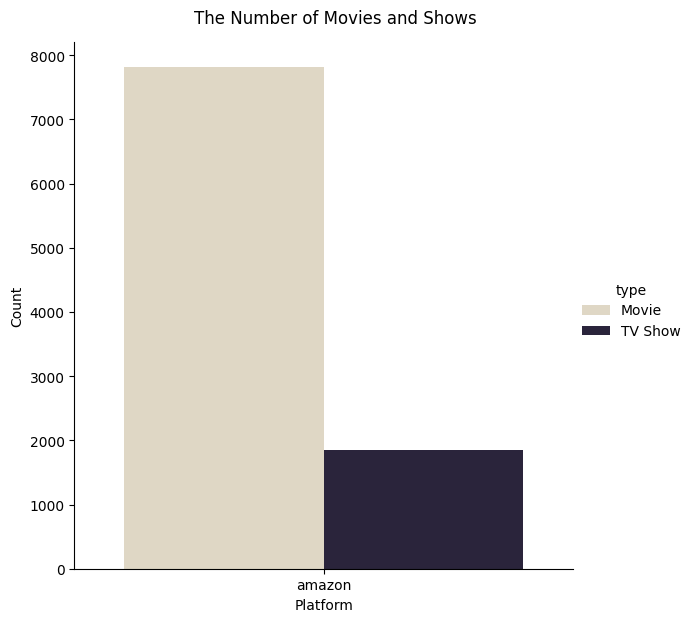

In [14]:
g=sns.catplot(data=df,x='platform',kind='count',palette='ch:s=-.2,r=.6',order=['amazon'],hue='type',height=6)
g.fig.suptitle('The Number of Movies and Shows',y=1.03)
g.set(xlabel='Platform',ylabel='Count')
plt.show()

This cell creates a catplot using the seaborn library to visualize the frequency distribution of values in the "type" column of the DataFrame object df, segmented by the "platform" column.

Here is a breakdown of what the code is doing:

* **sns.catplot():** This creates the categorical plot using the "platform" and "type" columns as the variables to count and the DataFrame object df as the data source. The x parameter specifies the "platform" column to plot on the x-axis, and the hue parameter specifies the "type" column to plot as a separate segment. The kind parameter specifies the type of plot to create, which in this case is a countplot. The palette parameter specifies the color palette to use for the plot.

* **data=df:** This specifies the data source for the plot.

* **x='platform':** This sets the variable to plot on the x-axis to be the "platform" column.

* **hue='type':** This sets the variable to segment the plot by to be the "type" column.

* **palette='ch:s=-.2,r=.6':** This sets the color palette to be used for the plot.

* **order=['amazon']:** This sets the order in which the values in the "platform" column will be displayed.

* **height=6:** This sets the height of the plot.

* **g.fig.suptitle():** This sets the title of the plot.

* **g.set():** This sets the x-axis and y-axis labels for the plot.

**Top rating on Amazon**

In [15]:
df.rating.value_counts()

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

This cell returns a Series object containing the count of unique values in the "rating" column of the DataFrame object df.

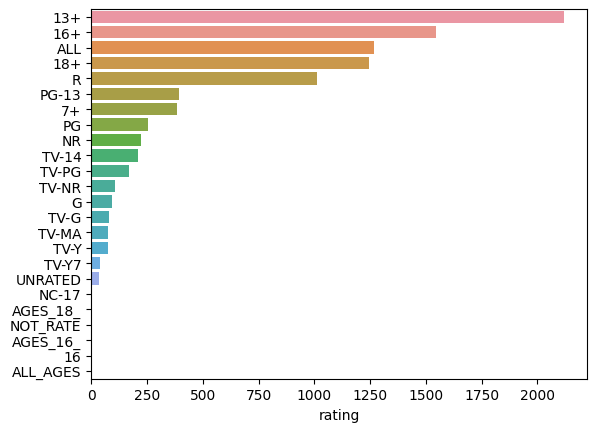

In [16]:
sns.barplot(x=df.rating.value_counts(),y=df.rating.value_counts().index , data=df , orient='h')
plt.show()

This cell creates a horizontal bar plot using the seaborn library to visualize the frequency distribution of values in the "rating" column of the DataFrame object df.

Here is a breakdown of what the code is doing:

* **sns.barplot():** This creates the bar plot using the "rating" column as the variable to count and the DataFrame object df as the data source. The x parameter specifies the counts for each rating, and the y parameter specifies the unique values in the "rating" column.

* **x=df.rating.value_counts():** This sets the values for the horizontal axis to be the counts of each unique value in the "rating" column.

* **y=df.rating.value_counts().index:** This sets the labels for each bar to be the unique values in the "rating" column.

* **data=df:** This specifies the data source for the plot.

* **orient='h':** This sets the orientation of the plot to be horizontal.

**Top productive years**

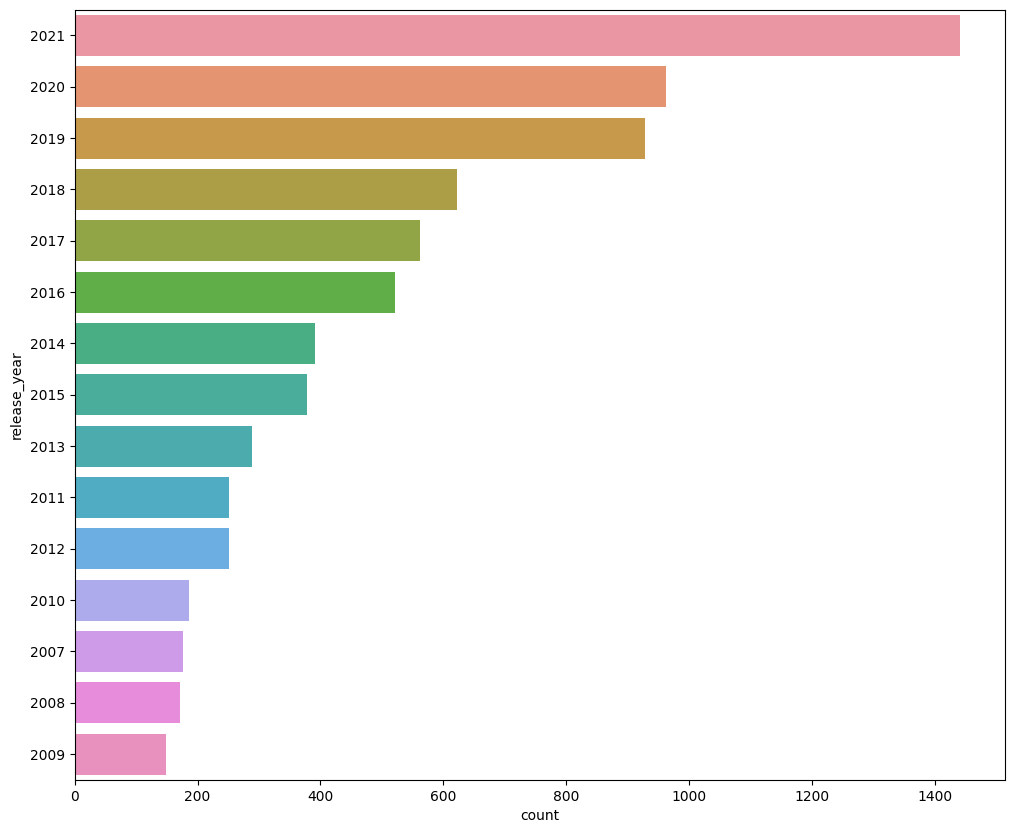

In [17]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y = "release_year", data =df , order=df.release_year.value_counts().index[0:15])

This cell creates a countplot using the seaborn library to visualize the frequency distribution of values in the "release_year" column of the DataFrame object df.

Here is a breakdown of what the code is doing:

* **plt.figure(figsize=(12,10)):** This creates a new figure with a specific size.

* **sns.countplot():** This creates the countplot using the "release_year" column as the variable to count and the DataFrame object df as the data source. The y parameter specifies the variable to count, and the data parameter specifies the data source for the plot.

* **y="release_year":** This sets the variable to count to be the "release_year" column.

* **data=df:** This specifies the data source for the plot.

* **order=df.release_year.value_counts().index[0:15]:** This sets the order in which the values in the "release_year" column will be displayed, with the most frequent values displayed first.

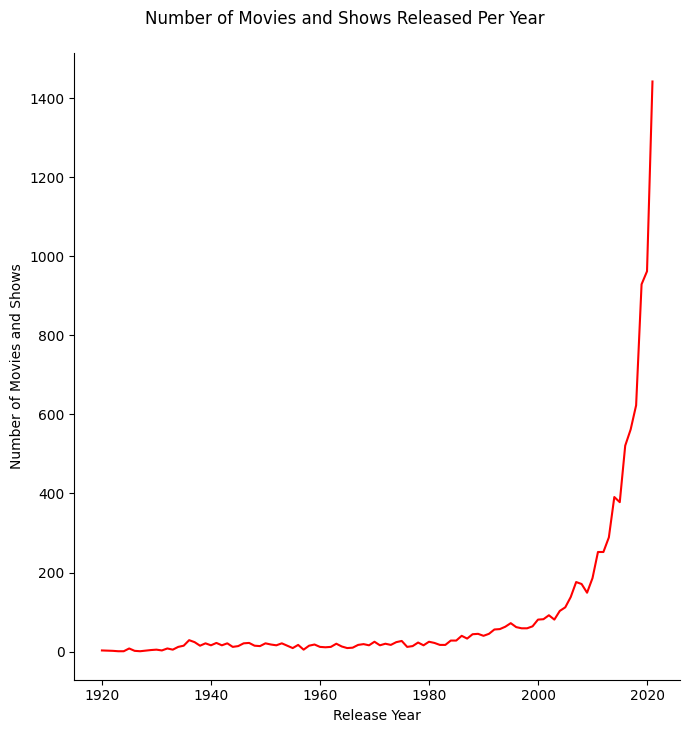

In [18]:
s_m_per_year=df.groupby('release_year').size()
s_m_df=s_m_per_year.reset_index()
s_m_df.columns=['year','frequency']
g=sns.relplot(data=s_m_df, x='year',y='frequency',kind='line',color='r',height=7)
g.fig.suptitle('Number of Movies and Shows Released Per Year',y=1.04)
g.set(xlabel='Release Year',ylabel='Number of Movies and Shows')
plt.show()

This cell creates a relplot using the seaborn library to visualize the frequency distribution of movies and shows released per year.

Here is a breakdown of what the code is doing:

* **df.groupby('release_year').size():** This groups the DataFrame object df by the "release_year" column and counts the number of rows in each group, which gives the number of movies and shows released per year. The result is stored in a pandas Series object called s_m_per_year.

* **s_m_per_year.reset_index():** This resets the index of the s_m_per_year Series and converts it to a DataFrame object. The "year" and "frequency" columns are created to store the index and values of the Series.

* **s_m_df.columns=['year','frequency']:** This renames the columns of the s_m_df DataFrame object to "year" and "frequency".

* **sns.relplot():** This creates a relational plot using the s_m_df DataFrame object as the data source. The x parameter specifies the "year" column to plot on the x-axis, and the y parameter specifies the "frequency" column to plot on the y-axis. The kind parameter specifies the type of plot to create, which in this case is a line plot. The color parameter specifies the color to use for the line.

* **data=s_m_df:** This specifies the data source for the plot.

* **x='year':** This sets the variable to plot on the x-axis to be the "year" column.

* **y='frequency':** This sets the variable to plot on the y-axis to be the "frequency" column.

* **kind='line':** This sets the type of plot to be a line plot.

* **color='r':** This sets the color of the line to be red.

* **height=7:** This sets the height of the plot.

* **g.fig.suptitle():** This sets the title of the plot.

* **g.set():** This sets the x-axis and y-axis labels for the plot.